<a href="https://colab.research.google.com/github/yashnarkhede/43_Scrum-Lordz_3/blob/main/Prediction_of_on_time_delivery_of_products.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of on time delivery of products

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder , StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency
from xgboost import XGBRegressor



In [25]:
dataset = pd.read_csv('/content/drive/MyDrive/Ecommerce_Train.csv')
dataset.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [26]:
dataset.shape

(10999, 12)

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [28]:
dataset.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [29]:
dataset.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [30]:
dataset.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


([<matplotlib.patches.Wedge at 0x7f34186d7690>,
 [Text(0.32902377754583456, 1.0496396304491695, '0'),
  Text(-0.32902377754583423, -1.0496396304491697, '1')],
 [Text(0.17946751502500063, 0.5725307075177288, '40.33%'),
  Text(-0.17946751502500047, -0.5725307075177288, '59.67%')])

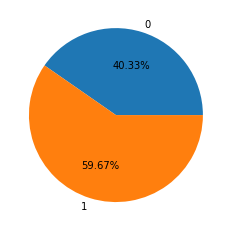

In [31]:
delay=pd.DataFrame(dataset.groupby(['Reached.on.Time_Y.N'])['ID'].count()/len(dataset)).reset_index()
plt.pie(delay['ID'],labels=delay['Reached.on.Time_Y.N'],autopct='%1.2f%%')

In [32]:
data_v1 = dataset[dataset['Reached.on.Time_Y.N']==0]

Text(0, 0.5, 'percentage')

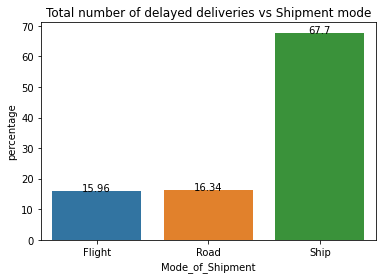

In [33]:
data_v2=pd.DataFrame((data_v1.groupby(['Mode_of_Shipment'])['ID'].count())/len(data_v1)*100)
data_v2=data_v2.reset_index()
visual=sns.barplot(x="Mode_of_Shipment", y="ID", data=data_v2 )
for index, row in data_v2.iterrows():
    visual.text(row.name,row.ID, round(row.ID,2), color='black', ha="center")
plt.title('Total number of delayed deliveries vs Shipment mode')
plt.ylabel('percentage')

Text(0, 0.5, 'percentage')

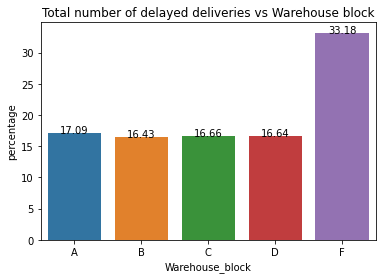

In [34]:
data_v3=pd.DataFrame((data_v1.groupby(['Warehouse_block'])['ID'].count())/len(data_v1)*100)
data_v3=data_v3.reset_index()
visual=sns.barplot(x="Warehouse_block", y="ID", data=data_v3 )
for index, row in data_v3.iterrows():
    visual.text(row.name,row.ID, round(row.ID,2), color='black', ha="center")
plt.title('Total number of delayed deliveries vs Warehouse block')
plt.ylabel('percentage')

In [35]:
dataset.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [36]:
#Dropping the ID column because of high cardinality
data=dataset.drop(['ID'],axis=1)
data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [37]:
#Warehouse_block
crossTab = pd.crosstab(data['Warehouse_block'], data['Reached.on.Time_Y.N'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1])

p-value  0.8959524278243698


In [38]:
#Warehouse_block
crossTab = pd.crosstab(data['Mode_of_Shipment'],data['Reached.on.Time_Y.N'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1])

p-value  0.6895487627593786


In [39]:
# Product_importance
crossTab = pd.crosstab(data['Product_importance'],data['Reached.on.Time_Y.N'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1])

p-value  0.002230383104745087


In [40]:
# Gender
crossTab = pd.crosstab(data['Gender'],data['Reached.on.Time_Y.N'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1])

p-value  0.6367032124181522


In [41]:
#Renaming the column Reached.on.Time_Y.N
data.rename(columns={'Reached.on.Time_Y.N':'Reached on Time'}, inplace=True)

In [42]:
data=pd.get_dummies(data,columns=['Product_importance'], drop_first=True)
data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,Reached on Time,Product_importance_low,Product_importance_medium
0,D,Flight,4,2,177,3,F,44,1233,1,1,0
1,F,Flight,4,5,216,2,M,59,3088,1,1,0
2,A,Flight,2,2,183,4,M,48,3374,1,1,0
3,B,Flight,3,3,176,4,M,10,1177,1,0,1
4,C,Flight,2,2,184,3,F,46,2484,1,0,1


In [43]:
X=data.drop(['Reached on Time','Warehouse_block','Mode_of_Shipment','Gender'],axis=1)
y=data['Reached on Time']

In [44]:
#Splitting data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

#Scaling the data
ms = MinMaxScaler()
X_train = ms.fit_transform(X_train)
X_test = ms.fit_transform(X_test)

In [45]:
X_train = pd.DataFrame(X_train,columns=X.columns)
X_test  =pd.DataFrame(X_test,columns=X.columns)
X_train.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Product_importance_low,Product_importance_medium
0,0.2,1.0,0.383178,0.125,0.093750,0.457852,1.0,0.0
1,0.8,0.5,0.495327,0.250,0.031250,0.510592,0.0,1.0
2,0.0,1.0,0.845794,0.125,0.078125,0.004529,0.0,1.0
3,0.6,1.0,0.574766,0.000,0.046875,0.480351,0.0,1.0
4,0.8,0.5,0.934579,0.250,0.046875,0.094814,1.0,0.0


In [46]:
svm_model = svm.SVC(gamma='auto',C=5,kernel='rbf')
svm_model.fit(X_train,y_train)
y_pred = svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.85      0.67       895
           1       0.83      0.53      0.65      1305

    accuracy                           0.66      2200
   macro avg       0.69      0.69      0.66      2200
weighted avg       0.72      0.66      0.66      2200



In [47]:
params = {'n_estimators':[100,150], 'criterion':['gini', 'entropy']}
#Hyper parameter tuning
rf_model =GridSearchCV(estimator=RandomForestClassifier(),param_grid=params,scoring='accuracy', cv=5)
rf_model = rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.66      0.61       895
           1       0.74      0.66      0.70      1305

    accuracy                           0.66      2200
   macro avg       0.65      0.66      0.65      2200
weighted avg       0.67      0.66      0.66      2200



In [48]:
xgbr = xgb.XGBRegressor(verbosity=0) 
print(xgbr)
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)
xgbr.fit(X_train, y_train)
score = xgbr.score(X_train, y_train)  
print("Training score: ", score)

XGBRegressor(verbosity=0)
Training score:  0.29123077585289303


**Artificial Neural Network**

In [49]:
ann = Sequential()
ann.add(Dense(14,input_dim=8,activation='relu'))
ann.add(Dense(8,activation='relu'))
ann.add(Dense(8,activation='relu'))
ann.add(Dense(8,activation='relu'))
ann.add(Dense(1,activation='sigmoid'))
ann.compile(loss="binary_crossentropy", optimizer='Adam',metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=100, batch_size=15)

Epoch 1/100
587/587 [==============================] - 5s 3ms/step - loss: 0.6078 - accuracy: 0.6265
Epoch 2/100
587/587 [==============================] - 2s 3ms/step - loss: 0.5356 - accuracy: 0.6528
Epoch 3/100
587/587 [==============================] - 2s 3ms/step - loss: 0.5281 - accuracy: 0.6575
Epoch 4/100
587/587 [==============================] - 3s 4ms/step - loss: 0.5262 - accuracy: 0.6579
Epoch 5/100
587/587 [==============================] - 2s 4ms/step - loss: 0.5254 - accuracy: 0.6526
Epoch 6/100
587/587 [==============================] - 2s 3ms/step - loss: 0.5254 - accuracy: 0.6543
Epoch 7/100
587/587 [==============================] - 2s 3ms/step - loss: 0.5248 - accuracy: 0.6588
Epoch 8/100
587/587 [==============================] - 2s 4ms/step - loss: 0.5246 - accuracy: 0.6567
Epoch 9/100
587/587 [==============================] - 3s 6ms/step - loss: 0.5242 - accuracy: 0.6584
Epoch 10/100
587/587 [==============================] - 2s 4ms/step - loss: 0.5239 - accura

In [50]:
predictions = (ann.predict(X_test) > 0.5)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.57      0.91      0.70       895
           1       0.90      0.54      0.67      1305

    accuracy                           0.69      2200
   macro avg       0.73      0.72      0.69      2200
weighted avg       0.76      0.69      0.68      2200



**Conclusion:**
* ANN gives better accuracy of 68% than SVM and Random forest